## Activity 06
### Tyler Barna

In [1]:
## import modules (running on python 3.9.12)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import random
import scipy
import seaborn as sns


import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import invgamma
from scipy.stats import nbinom

## set seed for reproducibility
random.seed(5731) 

## import data 
df = pd.read_csv('../Activity 05/planet_radii.csv')
display(df.describe())

,Radius
count,1261.000000
mean,2.203620
std,1.869886
min,0.270000
25%,1.250000
50%,1.780000
75%,2.450000
max,16.100000


First, we'll start off with the improper prior

In [2]:
y = np.log(df['Radius'])
n = len(y)
y_mean = np.mean(y)
y_var = np.var(y)

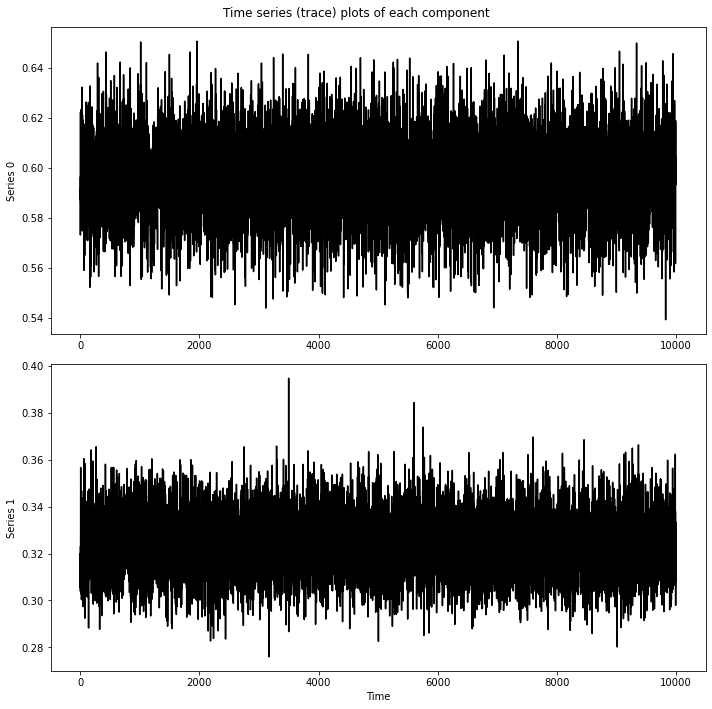

In [23]:
msim = 1e4

mchain = np.zeros((int(msim), 2))
mchain[0,] = (y_mean,y_var)
for idx in range(1, int(msim)):
    mchain[idx,0] = np.random.normal(y_mean, 
                                     np.sqrt(mchain[idx-1,1]/n))
    mchain[idx,1] = invgamma.rvs(a=n/2,loc=0, 
                                 scale = ((n*(mchain[idx,0]-y_mean)**2 + (n-1)*y_var)/2))
    ## note: one has to set a in invgamma.rvs because it's a required argument

## plot the chains
fig, ax = plt.subplots(2,1, figsize=(10,10),facecolor='w')
for idx in (0,1):
    ax[idx].plot(np.arange(msim), mchain[:,idx], color='black')
    ax[idx].set_ylabel('Series %s'%idx)
ax[1].set_xlabel('Time')
fig.suptitle('Time series (trace) plots of each component')
fig.tight_layout()
plt.show();